In [25]:
import random
import numpy as np
import pandas as pd

# Tools
from sklearn.preprocessing import StandardScaler,
                                    LabelEncoder
from sklearn.model_selection import train_test_split, 
                                    cross_val_score,
                                    GridSearchCV

# Evaluation Metrics
from sklearn.metrics import accuracy_score,
                            confusion_matrix,
                            classification_report,
                            make_scorer

# Model
from sklearn import svm

# Visuals
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
data = pd.read_csv('Lesikulit.csv', index_col=False)

In [4]:
data.head()

,energy0,correlation0,homogeneity0,contrast0,energy45,correlation45,homogeneity45,contrast45,energy90,correlation90,...,contrast90,energy135,correlation135,homogeneity135,contrast135,asym,border,color,diameter,label
0,0.440027,0.987313,0.876831,58.919599,0.437526,0.980937,0.829286,88.504887,0.439023,0.984782,...,70.668794,0.437373,0.979830,0.830626,93.645957,0.000008,16366.942740,0.021012,565.364132,mls
1,0.328523,0.961991,0.766172,87.760241,0.326387,0.962305,0.726479,86.901689,0.331537,0.976304,...,54.770630,0.325155,0.950490,0.723046,114.141077,0.000016,4572.983745,0.083268,294.095963,mls
2,0.328545,0.973316,0.815981,88.991741,0.323068,0.955651,0.738847,147.450430,0.327842,0.970674,...,97.760656,0.324809,0.968194,0.771296,105.747141,0.000011,3259.533423,0.119282,264.981775,mls
3,0.256278,0.981375,0.858117,64.215994,0.251838,0.972170,0.800008,95.627266,0.255849,0.980794,...,66.183715,0.252077,0.973593,0.805094,90.735270,0.000005,11659.430540,0.060257,502.663474,mls
4,0.299454,0.976365,0.802904,73.571775,0.295586,0.965048,0.742212,108.530538,0.299521,0.974358,...,79.788690,0.296181,0.967294,0.752107,101.555432,0.000008,8230.659198,0.096353,408.703856,mls


In [6]:
for i in range(len(data.columns)):
    print('Indeks [',i,'] = ', data.columns[i])

Indeks [ 0 ] =  energy0
Indeks [ 1 ] =  correlation0
Indeks [ 2 ] =  homogeneity0
Indeks [ 3 ] =  contrast0
Indeks [ 4 ] =  energy45
Indeks [ 5 ] =  correlation45
Indeks [ 6 ] =  homogeneity45
Indeks [ 7 ] =  contrast45
Indeks [ 8 ] =  energy90
Indeks [ 9 ] =  correlation90
Indeks [ 10 ] =  homogeneity90
Indeks [ 11 ] =  contrast90
Indeks [ 12 ] =  energy135
Indeks [ 13 ] =  correlation135
Indeks [ 14 ] =  homogeneity135
Indeks [ 15 ] =  contrast135
Indeks [ 16 ] =  asym
Indeks [ 17 ] =  border
Indeks [ 18 ] =  color
Indeks [ 19 ] =  diameter
Indeks [ 20 ] =  label


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   energy0         203 non-null    float64
 1   correlation0    203 non-null    float64
 2   homogeneity0    203 non-null    float64
 3   contrast0       203 non-null    float64
 4   energy45        203 non-null    float64
 5   correlation45   203 non-null    float64
 6   homogeneity45   203 non-null    float64
 7   contrast45      203 non-null    float64
 8   energy90        203 non-null    float64
 9   correlation90   203 non-null    float64
 10  homogeneity90   203 non-null    float64
 11  contrast90      203 non-null    float64
 12  energy135       203 non-null    float64
 13  correlation135  203 non-null    float64
 14  homogeneity135  203 non-null    float64
 15  contrast135     203 non-null    float64
 16  asym            203 non-null    float64
 17  border          203 non-null    flo

In [8]:
data.corr()

,energy0,correlation0,homogeneity0,contrast0,energy45,correlation45,homogeneity45,contrast45,energy90,correlation90,homogeneity90,contrast90,energy135,correlation135,homogeneity135,contrast135,asym,border,color,diameter
energy0,1.000000,0.060489,0.416812,0.386419,0.999466,0.083944,0.493533,0.364940,0.999722,0.103627,0.453492,0.338805,0.999528,0.109489,0.491347,0.350955,0.339382,-0.259318,-0.271864,-0.355105
correlation0,0.060489,1.000000,0.449881,-0.426362,0.077197,0.943072,0.411475,-0.418948,0.059691,0.850546,0.359773,-0.381104,0.074638,0.922912,0.359297,-0.384900,-0.502307,0.552277,-0.750715,0.644131
homogeneity0,0.416812,0.449881,1.000000,0.088987,0.413217,0.371793,0.935632,0.111864,0.411856,0.320448,0.871393,0.110544,0.413223,0.395810,0.943817,0.098910,0.111456,0.181364,-0.465862,0.152357
contrast0,0.386419,-0.426362,0.088987,1.000000,0.367217,-0.390598,0.111553,0.962604,0.383712,-0.373477,0.129607,0.932551,0.366538,-0.423814,0.130139,0.971596,0.866543,-0.560326,0.209586,-0.683850
energy45,0.999466,0.077197,0.413217,0.367217,1.000000,0.106430,0.495876,0.340752,0.999702,0.127730,0.456185,0.313892,0.999877,0.129630,0.489317,0.330252,0.317294,-0.245404,-0.286239,-0.336751
correlation45,0.083944,0.943072,0.371793,-0.390598,0.106430,1.000000,0.434703,-0.464206,0.089334,0.939712,0.405355,-0.438233,0.101034,0.914550,0.320062,-0.372272,-0.502677,0.524286,-0.728496,0.626480
homogeneity45,0.493533,0.411475,0.935632,0.111553,0.495876,0.434703,1.000000,0.063327,0.494309,0.408112,0.948554,0.053420,0.493151,0.401254,0.927999,0.100223,0.101111,0.165480,-0.469545,0.143580
contrast45,0.364940,-0.418948,0.111864,0.962604,0.340752,-0.464206,0.063327,1.000000,0.357530,-0.458111,0.072415,0.971330,0.343010,-0.439425,0.132049,0.945049,0.859240,-0.549583,0.215104,-0.681304
energy90,0.999722,0.059691,0.411856,0.383712,0.999702,0.089334,0.494309,0.357530,1.000000,0.114088,0.458063,0.328399,0.999703,0.114976,0.490875,0.344666,0.333525,-0.258942,-0.271779,-0.353143
correlation90,0.103627,0.850546,0.320448,-0.373477,0.127730,0.939712,0.408112,-0.458111,0.114088,1.000000,0.456376,-0.503003,0.125065,0.950097,0.345920,-0.424343,-0.520591,0.486434,-0.698437,0.592468


[Text(0, 0.5, 'energy0'),
 Text(0, 1.5, 'correlation0'),
 Text(0, 2.5, 'homogeneity0'),
 Text(0, 3.5, 'contrast0'),
 Text(0, 4.5, 'energy45'),
 Text(0, 5.5, 'correlation45'),
 Text(0, 6.5, 'homogeneity45'),
 Text(0, 7.5, 'contrast45'),
 Text(0, 8.5, 'energy90'),
 Text(0, 9.5, 'correlation90'),
 Text(0, 10.5, 'homogeneity90'),
 Text(0, 11.5, 'contrast90'),
 Text(0, 12.5, 'energy135'),
 Text(0, 13.5, 'correlation135'),
 Text(0, 14.5, 'homogeneity135'),
 Text(0, 15.5, 'contrast135'),
 Text(0, 16.5, 'asym'),
 Text(0, 17.5, 'border'),
 Text(0, 18.5, 'color'),
 Text(0, 19.5, 'diameter'),
 Text(0, 20.5, 'label')]

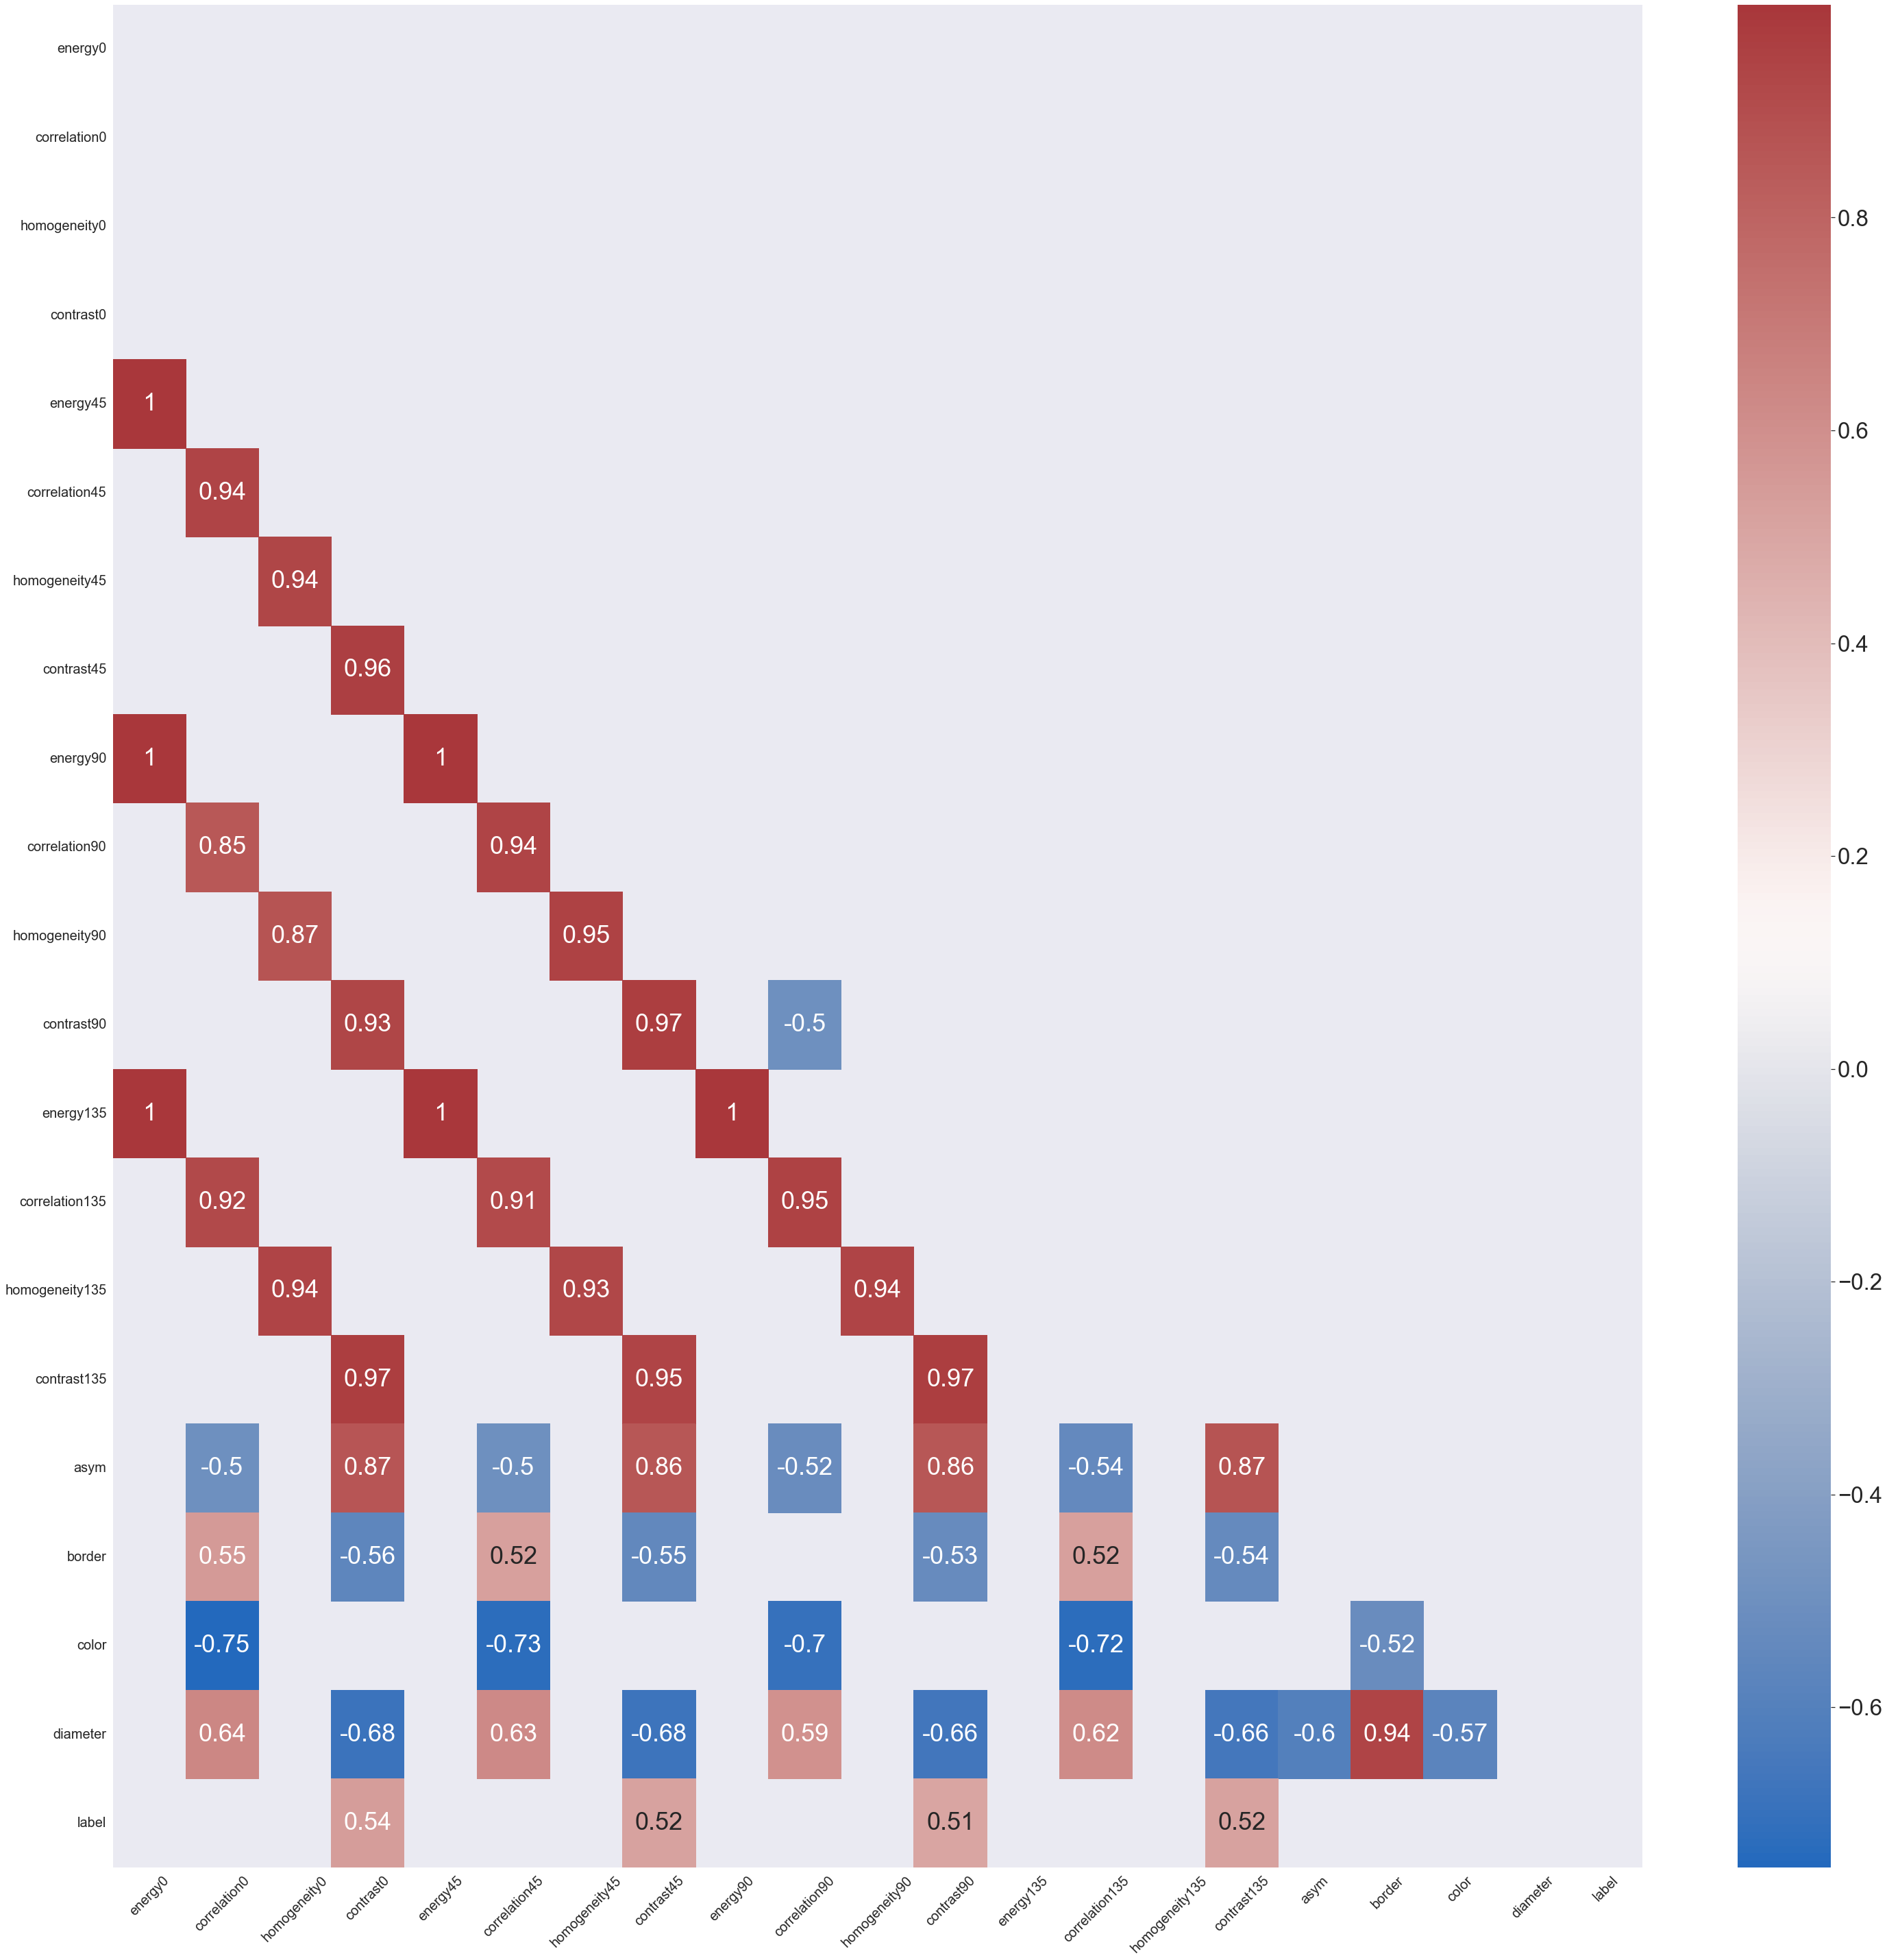

In [65]:
plt.figure(figsize = (50,50))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.set(font_scale=3)
res = sns.heatmap(corr[(corr > .5) | (corr < -.5)], annot = True, mask = mask, cmap = 'vlag')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 20, rotation = 45)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 20)

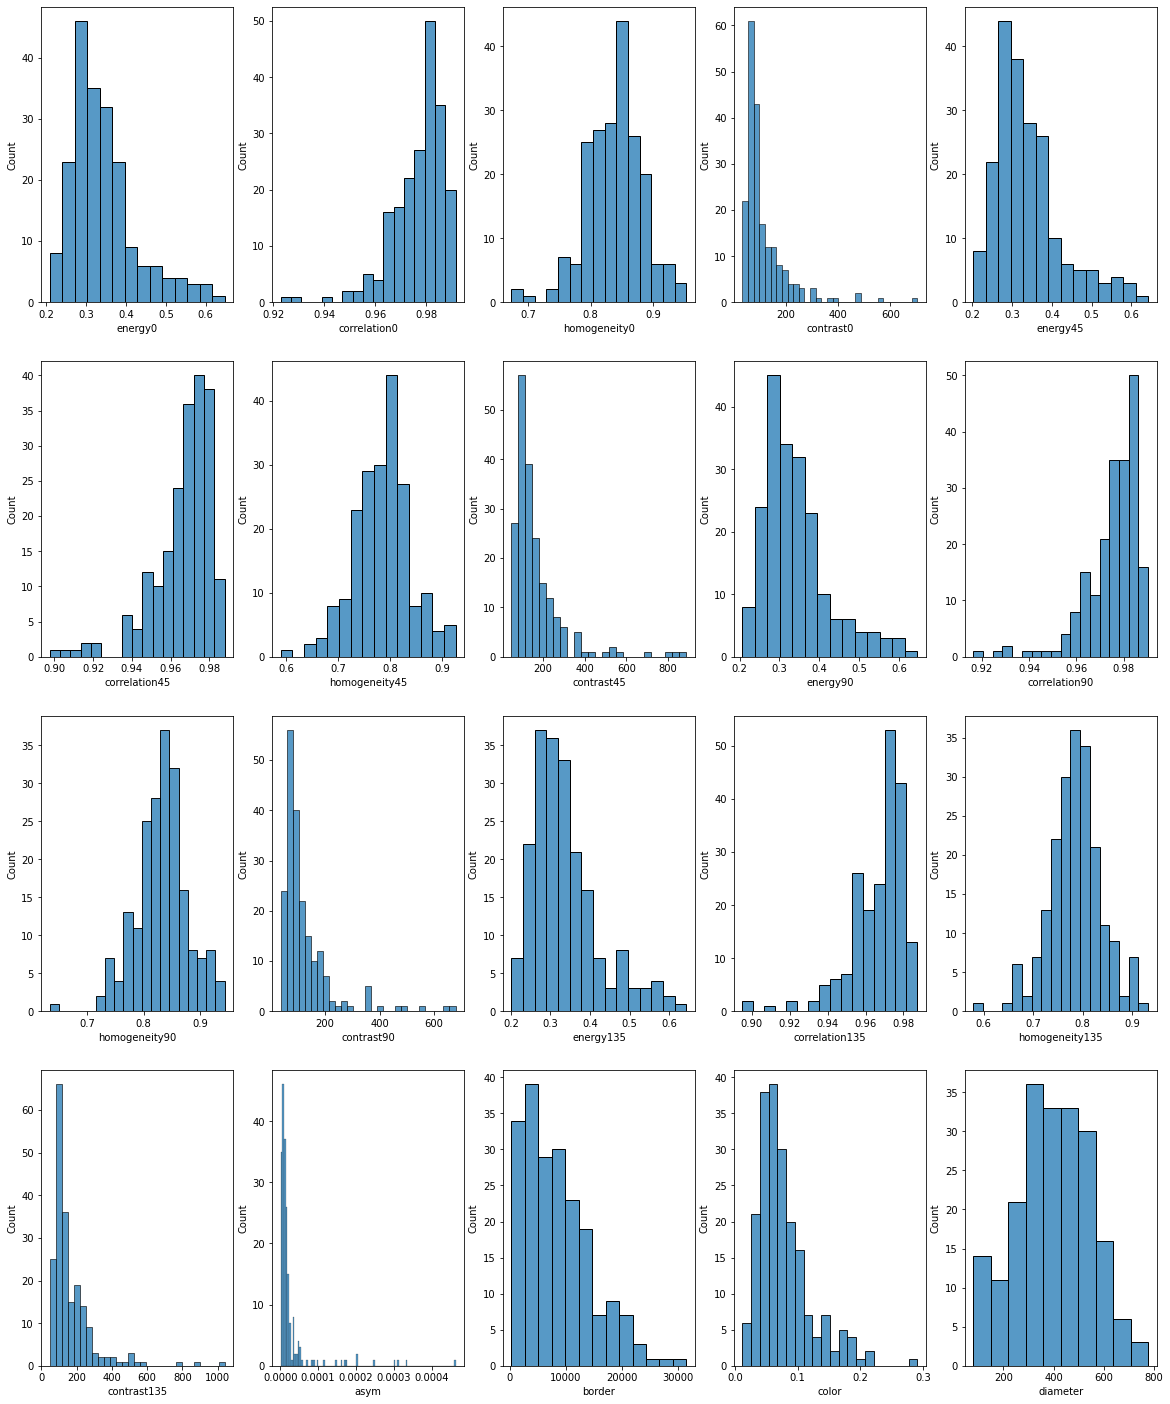

In [18]:
plt.figure(figsize = (20,25))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(4, 5, i+1)
    sns.histplot(data[col])

<AxesSubplot:xlabel='diameter', ylabel='Count'>

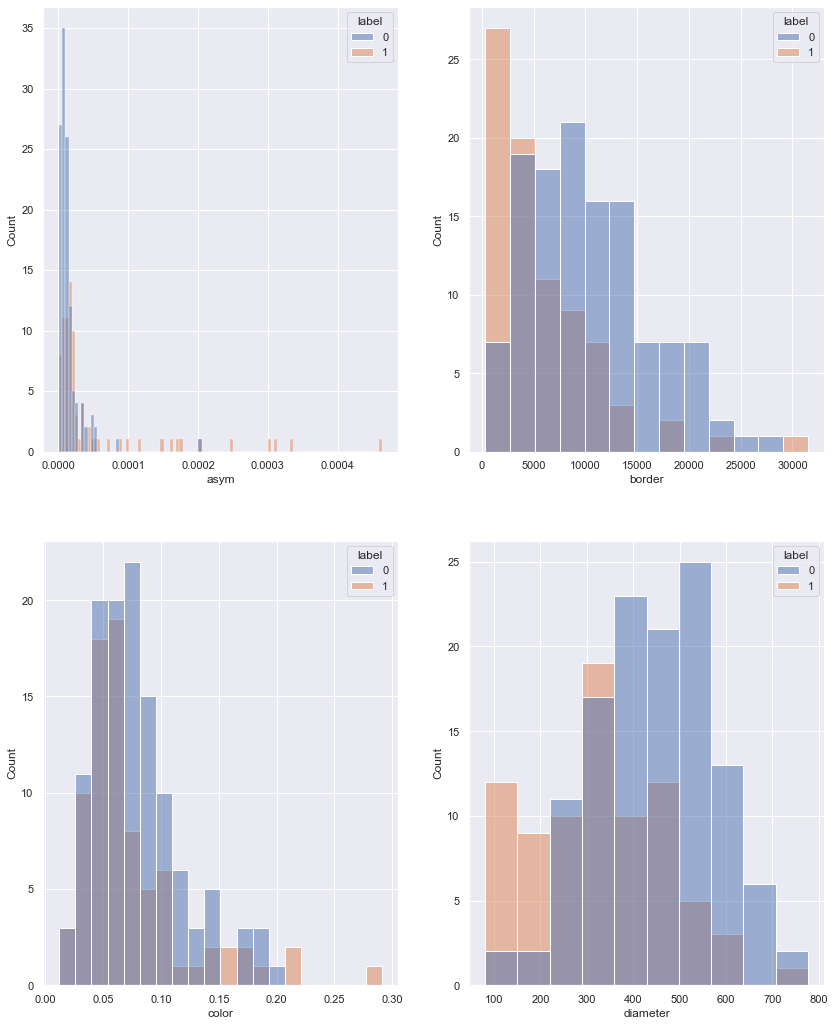

In [105]:
fig, axis = plt.subplots(2,2, figsize = (14,18))
sns.histplot(data = data, x = 'asym', hue = 'label', ax = axis[0,0])
sns.histplot(data = data, x = 'border', hue = 'label', ax = axis[0,1])
sns.histplot(data = data, x = 'color', hue = 'label', ax = axis[1,0])
sns.histplot(data = data, x = 'diameter', hue = 'label', ax = axis[1,1])

In [106]:
data.label

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

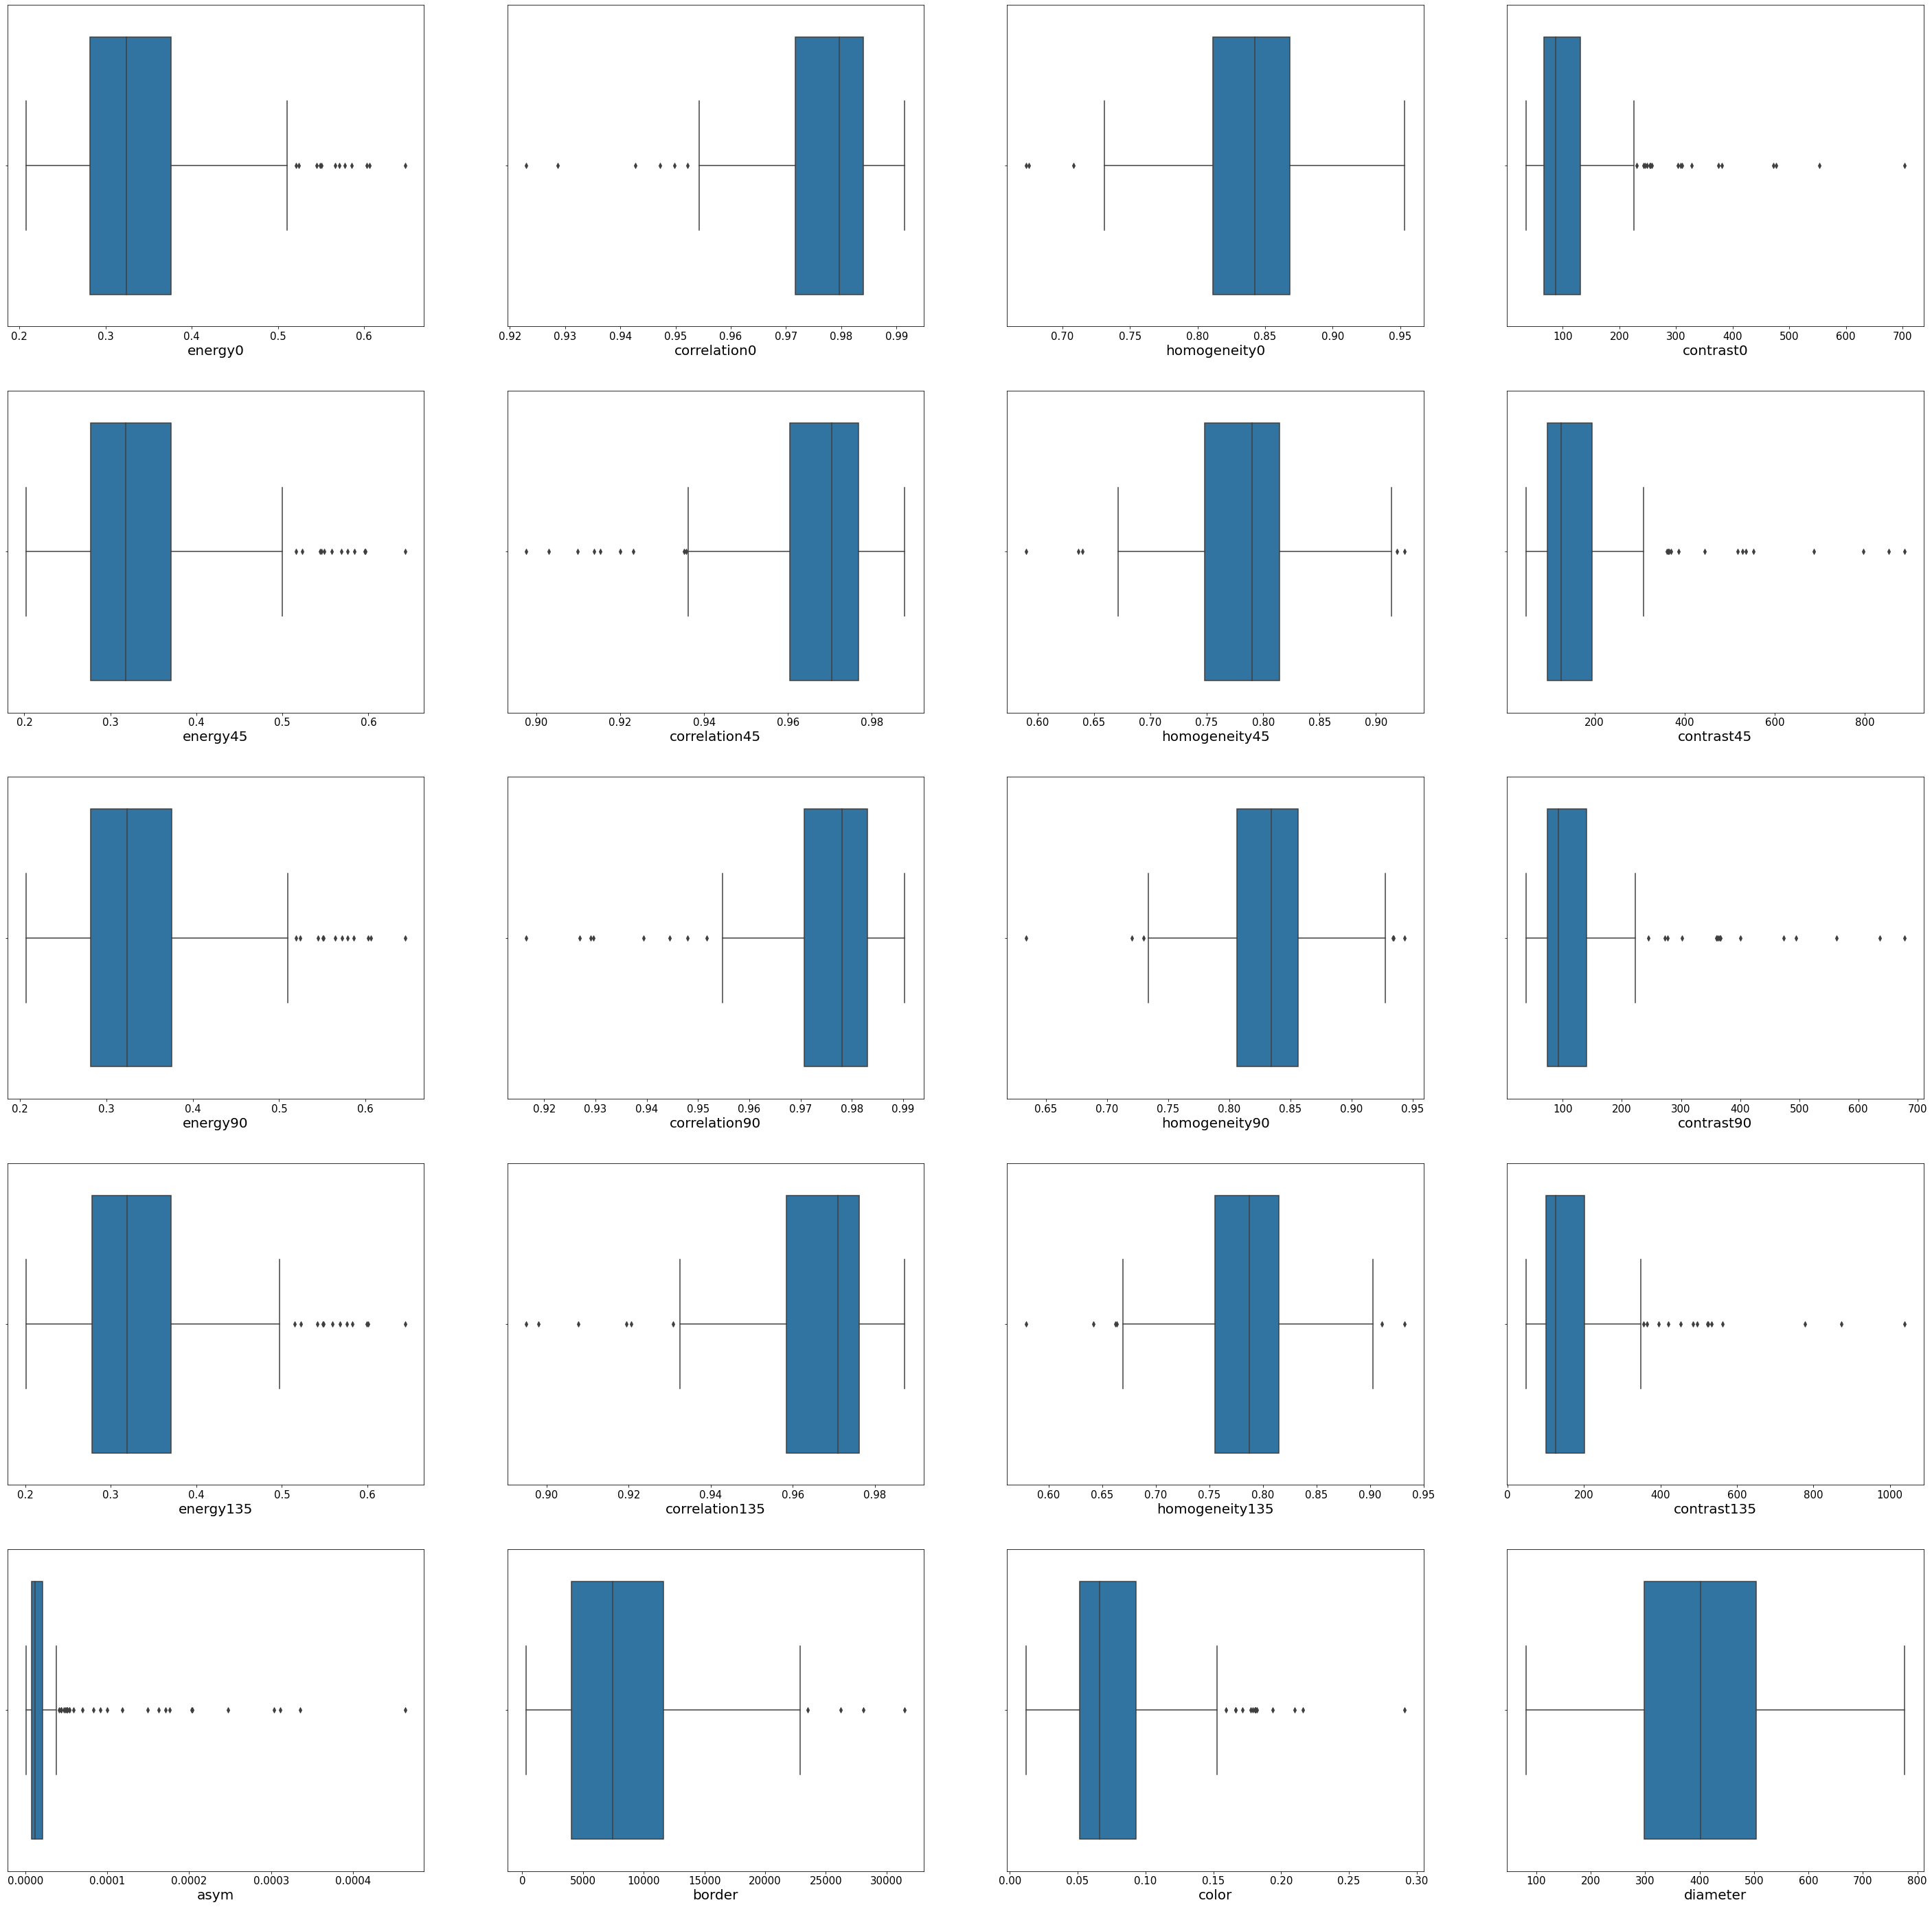

In [33]:
plt.figure(figsize = (50,50))

for i in enumerate(data.describe().columns):
    plt.subplot(5, 4, i[0]+1)
    sns.boxplot(data[i[1]])
    plt.xticks(fontsize = 15)
    plt.xlabel(i[1], fontsize = 20)
plt.show()

In [14]:
pd.set_option('display.max_rows', 500)
corr = corr.unstack()
corr = corr[abs(corr) >= 0.7]
corr

energy0         energy0           1.000000
                energy45          0.999466
                energy90          0.999722
                energy135         0.999528
correlation0    correlation0      1.000000
                correlation45     0.943072
                correlation90     0.850546
                correlation135    0.922912
                color            -0.750715
homogeneity0    homogeneity0      1.000000
                homogeneity45     0.935632
                homogeneity90     0.871393
                homogeneity135    0.943817
contrast0       contrast0         1.000000
                contrast45        0.962604
                contrast90        0.932551
                contrast135       0.971596
                asym              0.866543
energy45        energy0           0.999466
                energy45          1.000000
                energy90          0.999702
                energy135         0.999877
correlation45   correlation0      0.943072
           

In [34]:
Features = data.columns[data.columns != 'label']
Target = 'label'

In [35]:
le = LabelEncoder()

data[Target] = le.fit_transform(data[Target])

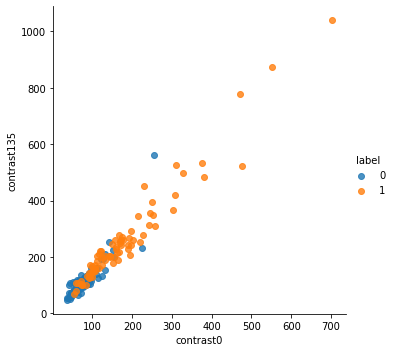

In [37]:
sns.lmplot('contrast0', 'contrast135', data, hue=data.columns[20], fit_reg=False)

In [38]:
x = data[Features]
y = data[Target]

scaler = StandardScaler()
xs = scaler.fit_transform(x)

In [46]:
skor = []
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.3, random_state = i)
    clf = svm.SVC(C = 10, gamma = 0.1, kernel= 'rbf')
    clf.fit(x_train, y_train)
    classifier_score = clf.score(x_test, y_test)
    skor.append(classifier_score)

In [57]:
print("Score :",max(skor),'indeks :',skor.index(max(skor)))

Score : 0.9180327868852459 indeks : 74


In [58]:
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.3, random_state = 74)
clf = svm.SVC(C = 10, gamma = 0.1, kernel= 'rbf')
clf.fit(x_train, y_train)
classifier_score = clf.score(x_test, y_test)
print ('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))


The classifier accuracy score is 0.92



              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.82      0.90        28

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.92        61
weighted avg       0.93      0.92      0.92        61

TP =  33
TN =  23
FP =  5
FN =  0
Accuracy :  0.9180327868852459
Sensitivity :  1.0
Specificity :  0.8214285714285714
Precision :  0.868421052631579
Error :  0.08196721311475408


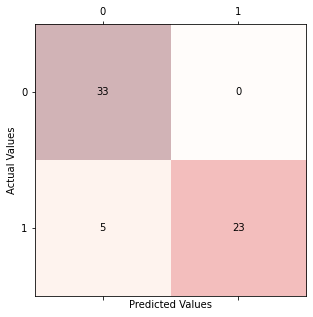

In [59]:
y_pred = clf.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

tp = cm[0,0]
tn = cm[1,1]
fn = cm[0,1]
fp = cm[1,0]
print('TP = ', tp)
print('TN = ', tn)
print('FP = ', fp)
print('FN = ', fn)

total1=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

precision1 = tp/(tp+fp)
print('Precision : ', precision1)

error1 = (1 - accuracy1)
print('Error : ', error1)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
        ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

In [101]:
Xtest = x_test[:, 17:19]

per1 = svm.SVC(kernel='rbf', C=1, gamma=0.1).fit(Xtest, y_test)
per2 = svm.SVC(kernel='rbf', C=1, gamma=1).fit(Xtest, y_test)
per3 = svm.SVC(kernel='rbf', C=10, gamma=0.1).fit(Xtest, y_test)
per4 = svm.SVC(kernel='rbf', C=10, gamma=1).fit(Xtest, y_test)

In [102]:
x_min, x_max = Xtest[:, 0].min() - 1, Xtest[:, 0].max() + 1
y_min, y_max = Xtest[:, 1].min() - 1, Xtest[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

titles = ['SVC with rbf kernel (C = 1, Gamma = 0.1)',
          'SVC with rbf kernel (C = 1, Gamma = 1)',
          'SVC with rbf kernel (C = 10, Gamma = 0.1)',
          'SVC with rbf kernel (C = 10, Gamma = 1)']

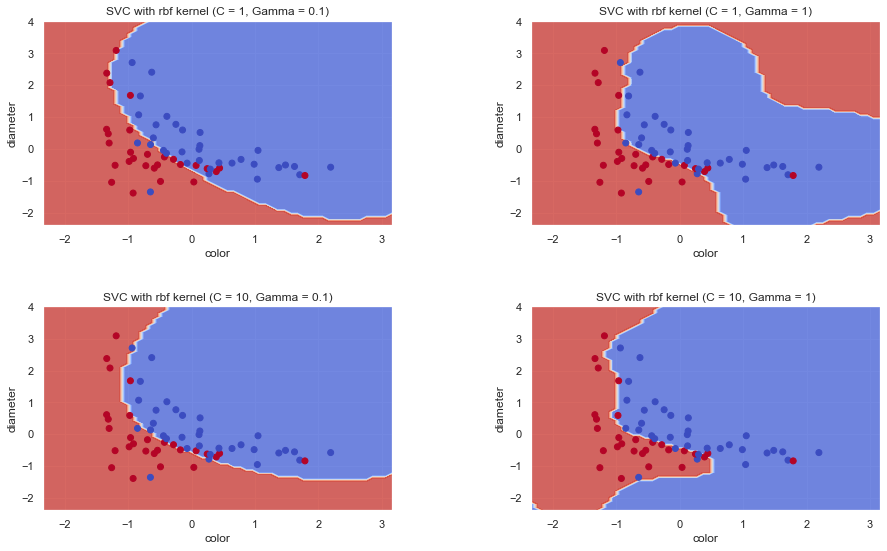

In [104]:
sns.set(font_scale=1)
for i, clf in enumerate((per1, per2, per3, per4)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(Xtest[:, 0], Xtest[:, 1], c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel(data.columns[18])
    plt.ylabel(data.columns[19])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titles[i])

plt.show()